<a href="https://colab.research.google.com/github/SebaDiezV/Challenge_TelecomX_Parte2_AluraLatam/blob/main/TelecomX_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X - Parte 2**
##**Challenge de Alura Latam y Oracle para el curso de DataScience**

## **01 -  Preparación de los datos**

###**Exportar bibliotécas**

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_recall_curve

### **Extracción de archivo tratado**

Se carga el archivo utilizado en el proyecto anterior de Telecom X, al cual ya se le realizó el análisis EDA.

In [2]:
datos = pd.read_csv('/content/datos_tratados.csv')

In [3]:
datos.head()

,id_cliente,cancelacion_cliente,genero,adulto_mayor,pareja,dependiente,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_online,metodo_pago,mensualidad,total,cuentas_diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Sí,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Sí,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Sí,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7043 non-null   object 
 1   cancelacion_cliente      7043 non-null   object 
 2   genero                   7043 non-null   object 
 3   adulto_mayor             7043 non-null   int64  
 4   pareja                   7043 non-null   int64  
 5   dependiente              7043 non-null   int64  
 6   meses_contrato           7043 non-null   int64  
 7   servicio_telefonico      7043 non-null   int64  
 8   lineas_multiples         7043 non-null   object 
 9   servicio_internet        7043 non-null   object 
 10  seguridad_online         7043 non-null   object 
 11  respaldo_online          7043 non-null   object 
 12  proteccion_dispositivos  7043 non-null   object 
 13  soporte_tecnico          7043 non-null   object 
 14  tv_streaming            

In [5]:
datos.apply(pd.unique)

,0
id_cliente,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
cancelacion_cliente,"[No, Sí]"
genero,"[Female, Male]"
adulto_mayor,"[0, 1]"
pareja,"[1, 0]"
dependiente,"[1, 0]"
meses_contrato,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
servicio_telefonico,"[1, 0]"
lineas_multiples,"[No, Yes, No phone service]"
servicio_internet,"[DSL, Fiber optic, No]"


Después de la revisión de los datos se decide traspasar las columnas que contienen valores binarios, "Sí" y "No", "Male" y "Female" a valores de 0 y 1 para una mejor interpretación.

Para la variable "cancelacion_cliente", "No" pasa a ser 0 y "Sí", 1.

Para la variable "genero", "Female" pasa a ser 0 y "Male", 1.

In [6]:
datos['cancelacion_cliente'] = datos['cancelacion_cliente'].apply(lambda x: x.replace('Sí','1').replace('No','0'))
datos['genero'] = datos['genero'].apply(lambda x: x.replace('Male','1').replace('Female','0'))
datos.sample(3)

,id_cliente,cancelacion_cliente,genero,adulto_mayor,pareja,dependiente,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_online,metodo_pago,mensualidad,total,cuentas_diarias
2002,2888-ADFAO,0,0,0,1,1,47,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Bank transfer (automatic),21.3,1041.80,0.71
2080,2987-BJXIK,0,0,0,0,0,70,1,Yes,DSL,...,Yes,No,Yes,Yes,Two year,0,Mailed check,84.7,5991.05,2.82
4887,6890-PFRQX,0,1,0,0,0,18,1,Yes,DSL,...,Yes,No,Yes,No,Month-to-month,0,Mailed check,69.5,1199.40,2.32


In [7]:
datos[['cancelacion_cliente','genero']] = datos[['cancelacion_cliente','genero']].astype(np.int64)

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7043 non-null   object 
 1   cancelacion_cliente      7043 non-null   int64  
 2   genero                   7043 non-null   int64  
 3   adulto_mayor             7043 non-null   int64  
 4   pareja                   7043 non-null   int64  
 5   dependiente              7043 non-null   int64  
 6   meses_contrato           7043 non-null   int64  
 7   servicio_telefonico      7043 non-null   int64  
 8   lineas_multiples         7043 non-null   object 
 9   servicio_internet        7043 non-null   object 
 10  seguridad_online         7043 non-null   object 
 11  respaldo_online          7043 non-null   object 
 12  proteccion_dispositivos  7043 non-null   object 
 13  soporte_tecnico          7043 non-null   object 
 14  tv_streaming            

### **Eliminación de Columnas Irrelevantes**

Se elimina la columna "id_ cliente" ya que no realiza aporte alguno al análisis.

In [9]:
datos.columns

Index(['id_cliente', 'cancelacion_cliente', 'genero', 'adulto_mayor', 'pareja',
       'dependiente', 'meses_contrato', 'servicio_telefonico',
       'lineas_multiples', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'tipo_contrato',
       'factura_online', 'metodo_pago', 'mensualidad', 'total',
       'cuentas_diarias'],
      dtype='object')

In [10]:
datos = datos.drop(columns =['id_cliente'])

In [11]:
datos.head(2)

,cancelacion_cliente,genero,adulto_mayor,pareja,dependiente,meses_contrato,servicio_telefonico,lineas_multiples,servicio_internet,seguridad_online,...,proteccion_dispositivos,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_online,metodo_pago,mensualidad,total,cuentas_diarias
0,0,0,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.19
1,0,1,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,2.00


###**Verificación de la Proporción de Cancelación (Churn)**

Un 27% de los clientes del data set cancela los servicios.

In [12]:
datos['cancelacion_cliente'].value_counts()

,count
cancelacion_cliente,
0,5174
1,1869


In [13]:
datos['cancelacion_cliente'].value_counts(normalize=True).round(4)*100

,proportion
cancelacion_cliente,
0,73.46
1,26.54


##**02 - Selección de Variables**

###**Análisis Dirigido**

Se realizan gráficos tipo BoxPlot para visualizar distintas tendencias de cómo variables específicas se relacionan con la cancelación, además, se realiza el calculo del promedio de la cancelación en esas variables.

In [14]:
def custom_legend_name(new_names):
    for i, new_name in enumerate(new_names):
        fig.data[i].name = new_name

fig = px.box(datos, x = 'meses_contrato', color = 'cancelacion_cliente')
custom_legend_name(['No','Sí'])
fig.show()

In [15]:
datos.groupby('cancelacion_cliente')['meses_contrato'].mean().round(2)

,meses_contrato
cancelacion_cliente,
0,37.57
1,17.98


In [16]:
fig = px.box(datos, x = 'total', color = 'cancelacion_cliente')
custom_legend_name(['No','Sí'])
fig.show()

In [17]:
datos.groupby('cancelacion_cliente')['total'].mean().round(2)

,total
cancelacion_cliente,
0,2549.91
1,1531.80


In [18]:
fig = px.box(datos, x = 'mensualidad', color = 'cancelacion_cliente')
custom_legend_name(['No','Sí'])
fig.show()

In [19]:
datos.groupby('cancelacion_cliente')['mensualidad'].mean().round(2)

,mensualidad
cancelacion_cliente,
0,61.27
1,74.44


In [20]:
fig = px.box(datos, x = 'meses_contrato', color = 'cancelacion_cliente')
custom_legend_name(['No','Sí'])
fig.show()

In [21]:
datos.groupby('cancelacion_cliente')['meses_contrato'].mean().round(2)

,meses_contrato
cancelacion_cliente,
0,37.57
1,17.98


##**03 - Modelado Predictivo**

### **Encoding**

Se realiza el encoding para que datos ingresen de manera correcta a los modelos de Machine Learning.

In [22]:
one_hot = make_column_transformer((OneHotEncoder(drop= 'if_binary'),
                                   ['lineas_multiples', 'servicio_internet','seguridad_online'
                                   , 'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico',
                                    'tv_streaming', 'peliculas_streaming', 'tipo_contrato', 'metodo_pago']),
                                  remainder = 'passthrough',
                                  sparse_threshold= 0,
                                  force_int_remainder_cols=False)

Adicionalmente se realiza un encoding con el siguiente parametro:

```
drop = 'first'
```

Esto para evitar problemas de multicolinearidad en modelos de Machine Learning que son basados en ecuaciones lineales.

In [24]:
one_hot_first = make_column_transformer((OneHotEncoder(drop= 'first'),
                                   ['lineas_multiples', 'servicio_internet','seguridad_online'
                                   , 'respaldo_online', 'proteccion_dispositivos', 'soporte_tecnico',
                                    'tv_streaming', 'peliculas_streaming', 'tipo_contrato', 'metodo_pago']),
                                  remainder = 'passthrough',
                                  sparse_threshold= 0,
                                  force_int_remainder_cols=False)

In [25]:
datos_ohe = one_hot.fit_transform(datos)
datos_ohe = pd.DataFrame(datos_ohe, columns = one_hot.get_feature_names_out())
datos_ohe

,onehotencoder__lineas_multiples_No,onehotencoder__lineas_multiples_No phone service,onehotencoder__lineas_multiples_Yes,onehotencoder__servicio_internet_DSL,onehotencoder__servicio_internet_Fiber optic,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_No,onehotencoder__seguridad_online_No internet service,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_No,...,remainder__genero,remainder__adulto_mayor,remainder__pareja,remainder__dependiente,remainder__meses_contrato,remainder__servicio_telefonico,remainder__factura_online,remainder__mensualidad,remainder__total,remainder__cuentas_diarias
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30,2.19
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40,2.00
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85,2.46
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85,3.27
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90,1.84
7039,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70,2.84
7040,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75,1.68
7041,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65,2.26


In [26]:
datos_ohe_first = one_hot_first.fit_transform(datos)
datos_ohe_first = pd.DataFrame(datos_ohe_first, columns = one_hot_first.get_feature_names_out())
datos_ohe_first

,onehotencoder__lineas_multiples_No phone service,onehotencoder__lineas_multiples_Yes,onehotencoder__servicio_internet_Fiber optic,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_No internet service,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_No internet service,onehotencoder__respaldo_online_Yes,onehotencoder__proteccion_dispositivos_No internet service,onehotencoder__proteccion_dispositivos_Yes,...,remainder__genero,remainder__adulto_mayor,remainder__pareja,remainder__dependiente,remainder__meses_contrato,remainder__servicio_telefonico,remainder__factura_online,remainder__mensualidad,remainder__total,remainder__cuentas_diarias
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30,2.19
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40,2.00
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85,2.46
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85,3.27
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90,1.84
7039,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70,2.84
7040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75,1.68
7041,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65,2.26


###**Análisis de Correlación**

Se realiza el análisis de correlación tanto en el conjunto de datos original con la variables numéricas, también se realiza el análisis de correlación con los datos después del realizar el encoding.

In [27]:
numericas = datos.select_dtypes(include='number')

correlaciones = numericas.corr()['cancelacion_cliente'].sort_values(ascending=False)
print(correlaciones)

cancelacion_cliente    1.000000
cuentas_diarias        0.193412
mensualidad            0.193356
factura_online         0.191825
adulto_mayor           0.150889
servicio_telefonico    0.011942
genero                -0.008612
pareja                -0.150448
dependiente           -0.164221
total                 -0.198324
meses_contrato        -0.352229
Name: cancelacion_cliente, dtype: float64


In [28]:
corr = datos_ohe.corr()
corr['remainder__cancelacion_cliente'].sort_values(ascending=False)

,remainder__cancelacion_cliente
remainder__cancelacion_cliente,1.000000
onehotencoder__tipo_contrato_Month-to-month,0.405103
onehotencoder__seguridad_online_No,0.342637
onehotencoder__soporte_tecnico_No,0.337281
onehotencoder__servicio_internet_Fiber optic,0.308020
onehotencoder__metodo_pago_Electronic check,0.301919
onehotencoder__respaldo_online_No,0.268005
onehotencoder__proteccion_dispositivos_No,0.252481
remainder__cuentas_diarias,0.193412
remainder__mensualidad,0.193356


###**Separación de Datos**

Se realiza la separación de datos para el entrenamiento de modelos de Machine Learning, se crean conjuntos de entrenamiento, validación y test.

In [29]:
X = datos_ohe.drop(columns=['remainder__cancelacion_cliente'])
y = datos_ohe['remainder__cancelacion_cliente']

In [30]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, stratify=y,  test_size=0.30, random_state=30)


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, stratify=y_temp,  random_state=30)

In [32]:
X_first = datos_ohe_first.drop(columns=['remainder__cancelacion_cliente'])
y_first = datos_ohe_first['remainder__cancelacion_cliente']

In [33]:
X_temp_first, X_test_first, y_temp_first, y_test_first = train_test_split(X_first, y_first, stratify=y_first,  test_size=0.30, random_state=30)


In [34]:
X_train_first, X_val_first, y_train_first, y_val_first = train_test_split(X_temp_first, y_temp_first, stratify=y_temp_first, random_state=30)

###**Balanceo de Clases (opcional)**

Debido a la diferencia de datos que existen en la proporción de la variable "cancelacion_cliente" que puede sesgar los modelos, se opta por realizar oversampling de datos, generando datos artificiales para equiparar los datos.

In [35]:
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_train_res_first, y_train_res_first = smote.fit_resample(X_train_first, y_train_first)

###**Normalización o Estandarización (si es necesario)**

Se normalizan los datos que se utilizaran para entrenar los modelos que se basan en ecuaciones lineales.

In [36]:
normalizacion = MinMaxScaler()
X_res_norm = normalizacion.fit_transform(X_train_res_first)

In [37]:
pd.DataFrame(X_res_norm)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.847222,1.000000,1.000000,0.854011,0.747347,0.856287
1,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.681116,0.738911,0.682635
2,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.224215,0.041818,0.224551
3,0.000000,0.000000,1.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.541667,1.000000,0.000000,0.805680,0.451218,0.805389
4,0.000000,1.000000,1.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.694444,1.000000,0.000000,0.899851,0.652832,0.901198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,0.376603,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.623397,...,1.000000,0.000000,0.623397,0.623397,0.116342,0.623397,1.000000,0.305652,0.048457,0.304924
5428,0.000000,0.081636,1.0,0.0,0.0,0.918364,0.0,0.000000,0.0,0.000000,...,1.000000,0.000000,0.918364,0.000000,0.109977,1.000000,1.000000,0.569243,0.070895,0.568679
5429,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,1.000000,0.119749,0.119749,0.000000,0.513889,1.000000,0.119749,0.795173,0.404367,0.794866
5430,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.0,0.386291,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.191286,1.000000,1.000000,0.642516,0.129608,0.643172


###**Creación de Modelos**

Se utilizarán los siguientes modelos de Machine Learning:

*   DecisionTree
*   RandomForest
*   KNN
*   LogisticRegression



####**Baseline**

Se crea un modelo baseline para tener como referencia a la hora de entrenar los modelos.

In [38]:
dummy = DummyClassifier(strategy='most_frequent', random_state=30)
dummy.fit(X_train_res, y_train_res)
dummy.score(X_val, y_val)


0.7347931873479319

####**DecisionTree**

In [39]:
modelo_tree = DecisionTreeClassifier(max_depth=10, random_state=30, min_samples_split=5, min_samples_leaf=3)
modelo_tree.fit(X_train_res, y_train_res)

print(f'la exactitud del modelo con el conjunto de entrenamiento es de {modelo_tree.score(X_train_res, y_train_res)}')
print(f'la exactitud del modelo con el conjunto de validación es de {modelo_tree.score(X_val, y_val)}')

la exactitud del modelo con el conjunto de entrenamiento es de 0.8935935198821797
la exactitud del modelo con el conjunto de validación es de 0.7550689375506894


Para mayor precisión se utilizará el método de validación cruzada, donde se evaluará la métrica Recall

In [40]:
kf = KFold(n_splits= 5, shuffle= True, random_state= 30 )
cv_resultados_tree = cross_validate(modelo_tree, X_train_res,y_train_res, cv=kf, scoring='recall')
cv_resultados_tree

{'fit_time': array([0.04293489, 0.04954004, 0.05485678, 0.06386185, 0.06152821]),
 'score_time': array([0.007761  , 0.00603533, 0.00821137, 0.00802493, 0.00787497]),
 'test_score': array([0.79755672, 0.87022901, 0.80221811, 0.85009141, 0.83992467])}

In [41]:
print("Recall medio:", cv_resultados_tree['test_score'].mean())

Recall medio: 0.8320039838740506


####**RandomForestClassifier**





In [84]:
modelo_forest = RandomForestClassifier(max_depth= 15, random_state=30, class_weight='balanced', n_estimators=200, min_samples_split=5, min_samples_leaf=3)
modelo_forest.fit(X_train_res, y_train_res)

print(f'la exactitud del modelo con el conjunto de entrenamiento es de {modelo_forest.score(X_train_res, y_train_res)}')
print(f'la exactitud del modelo con el conjunto de validación es de {modelo_forest.score(X_val, y_val)}')

la exactitud del modelo con el conjunto de entrenamiento es de 0.9315169366715759
la exactitud del modelo con el conjunto de validación es de 0.7875101378751014


Se realiza validación cruzada.

In [45]:
cv_resultados_forest = cross_validate(modelo_forest, X_train_res,y_train_res, cv=kf, scoring='recall')
cv_resultados_forest

{'fit_time': array([1.47215462, 1.48806787, 1.45437646, 3.57523847, 3.05224657]),
 'score_time': array([0.05221343, 0.050107  , 0.05265284, 0.10646701, 0.04954123]),
 'test_score': array([0.84991274, 0.86832061, 0.82439926, 0.84460695, 0.85687382])}

In [46]:
print("Recall medio:", cv_resultados_forest['test_score'].mean())

Recall medio: 0.8488226762479298


Los modelos KNN y LogisticRegression se entrenarán con los datos del segundo conjunto que fue normalizado.

####**KNN**

In [47]:
modelo_knn = KNeighborsClassifier(n_neighbors=5)

In [48]:
modelo_knn.fit(X_res_norm, y_train_res_first)

KNeighborsClassifier()

In [49]:
X_val_first_norm = normalizacion.transform(X_val_first)

In [50]:
modelo_knn.score(X_val_first_norm, y_val_first)

0.6747769667477697

####**Regresión Logística**

In [95]:
modelo_regression = LogisticRegression(class_weight='balanced', random_state=30)

In [96]:
modelo_regression.fit(X_res_norm, y_train_res_first)

LogisticRegression(class_weight='balanced', random_state=30)

In [53]:
modelo_regression.score(X_val_first_norm, y_val_first)

0.7534468775344688

###**Evaluación de los Modelos**

Se crea una función para poder realizar la evaluación con mayor facilidad, se obtendrá el reporte de clasificación y la matriz de confusión, la métrica que se revisará con mayor importancia es "Recall" ya qué se debe detectar si los clientes abandonaran o no la compañía.

In [97]:
def evaluar_modelo(modelo, X, y_true):
  y_prev = modelo.predict(X)


  print('\nReporte de Clasificación:')
  print(classification_report(y_true, y_prev))
  print('Matriz de Confusión:')
  print(confusion_matrix(y_true, y_prev))
  visualizacion_cm = ConfusionMatrixDisplay(confusion_matrix(y_true, y_prev),
                                            display_labels = ['No', 'Sí'])
  visualizacion_cm.plot();

####**Evaluación DecisionTree**


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.83       906
         1.0       0.53      0.62      0.57       327

    accuracy                           0.76      1233
   macro avg       0.69      0.71      0.70      1233
weighted avg       0.77      0.76      0.76      1233

Matriz de Confusión:
[[728 178]
 [124 203]]


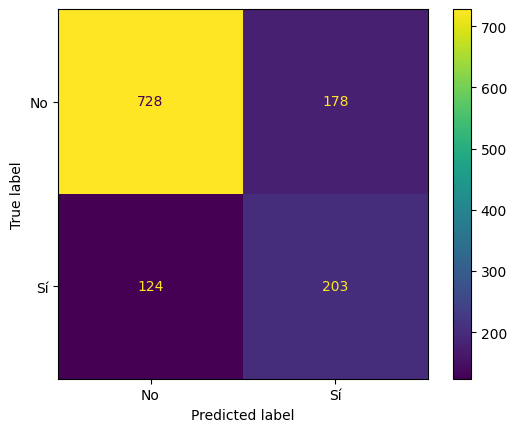

In [55]:
evaluar_modelo(modelo_tree, X_val, y_val)

####**Evaluación RandomForest**


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       906
         1.0       0.61      0.54      0.57       327

    accuracy                           0.79      1233
   macro avg       0.73      0.71      0.72      1233
weighted avg       0.78      0.79      0.78      1233

Matriz de Confusión:
[[794 112]
 [150 177]]


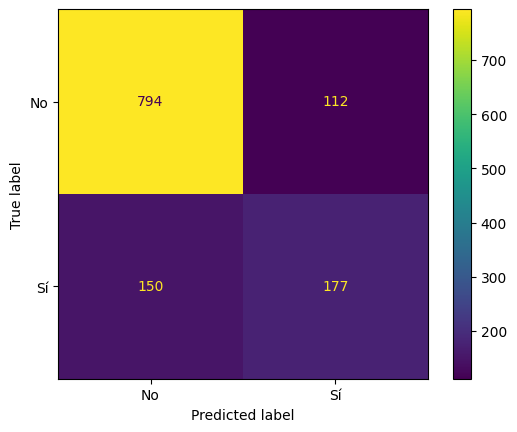

In [85]:
evaluar_modelo(modelo_forest, X_val, y_val)

####**Evaluación KNN**


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.87      0.65      0.75       906
         1.0       0.43      0.74      0.55       327

    accuracy                           0.67      1233
   macro avg       0.65      0.69      0.65      1233
weighted avg       0.76      0.67      0.69      1233

Matriz de Confusión:
[[591 315]
 [ 86 241]]


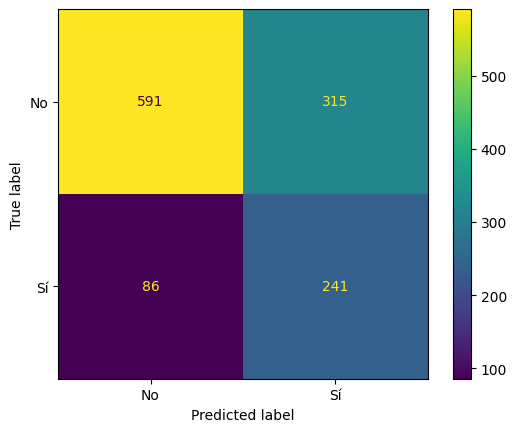

In [57]:
evaluar_modelo(modelo_knn, X_val_first_norm, y_val_first)

####**Evaluación Regresión Logística**


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.90      0.74      0.82       906
         1.0       0.52      0.78      0.63       327

    accuracy                           0.75      1233
   macro avg       0.71      0.76      0.72      1233
weighted avg       0.80      0.75      0.77      1233

Matriz de Confusión:
[[673 233]
 [ 71 256]]


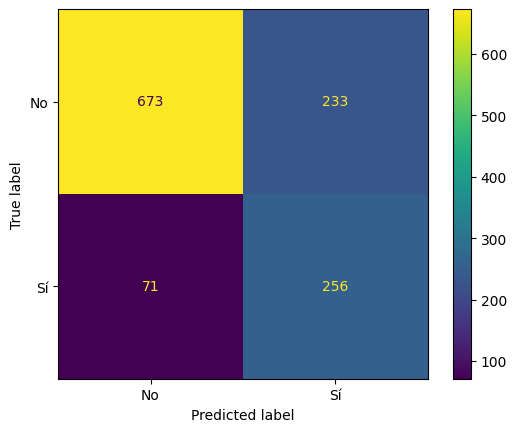

In [98]:
evaluar_modelo(modelo_regression, X_val_first_norm, y_val_first)

###**Segunda evaluación ajustando el umbral de decisión**

Se realiza la segunda evaluación con un ajuste en el umbral de decisión, esto evaluará con mayor sensibilidad los valores de abandono (1)





In [91]:
def evaluar_modelo_umbral(modelo, X, y_true, umbral= 0.3):
  y_proba = modelo.predict_proba(X)[:,1]
  y_prev =(y_proba >= umbral).astype(int)

  print("\nReporte de Clasificación:")
  print(classification_report(y_true, y_prev, digits=2))
  print("Matriz de Confusión:")
  print(confusion_matrix(y_true, y_prev))
  visualizacion_cm = ConfusionMatrixDisplay(confusion_matrix(y_true, y_prev),
                                            display_labels = ['No', 'Sí'])
  visualizacion_cm.plot();

####**Evaluación DecisionTree**




Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.87      0.73      0.80       906
         1.0       0.49      0.71      0.58       327

    accuracy                           0.72      1233
   macro avg       0.68      0.72      0.69      1233
weighted avg       0.77      0.72      0.74      1233

Matriz de Confusión:
[[662 244]
 [ 96 231]]


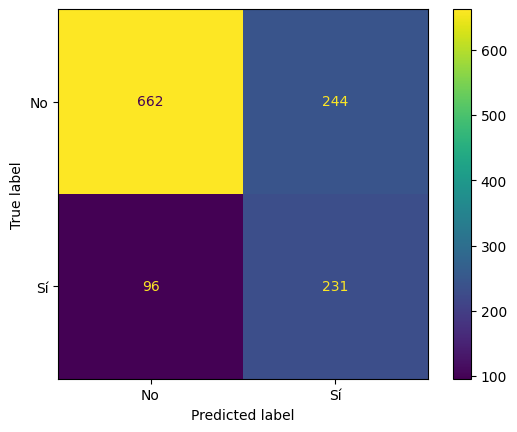

In [80]:
evaluar_modelo_umbral(modelo_tree, X_val, y_val, umbral=0.3)

####**Evaluación RandomForest**


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79       906
         1.0       0.49      0.79      0.60       327

    accuracy                           0.73      1233
   macro avg       0.70      0.75      0.70      1233
weighted avg       0.79      0.73      0.74      1233

Matriz de Confusión:
[[638 268]
 [ 69 258]]


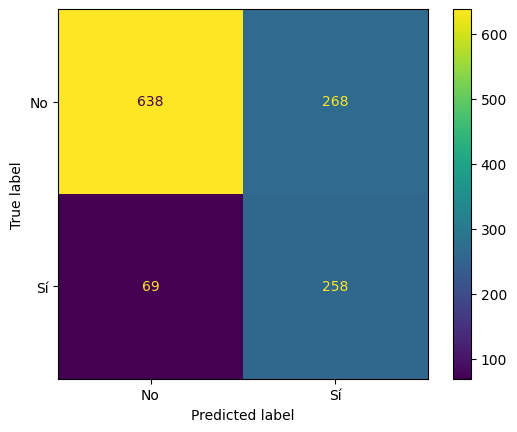

In [93]:
evaluar_modelo_umbral(modelo_forest, X_val, y_val, umbral=0.3)

####**Evaluación KNN**


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.91      0.53      0.67       906
         1.0       0.39      0.85      0.54       327

    accuracy                           0.61      1233
   macro avg       0.65      0.69      0.60      1233
weighted avg       0.77      0.61      0.63      1233

Matriz de Confusión:
[[478 428]
 [ 49 278]]


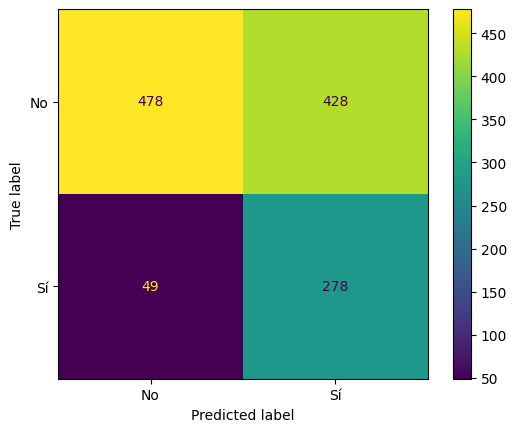

In [82]:
evaluar_modelo_umbral(modelo_knn, X_val_first_norm, y_val_first, umbral=0.3)

####**Evaluación Regresión Logística**


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72       906
         1.0       0.43      0.90      0.59       327

    accuracy                           0.66      1233
   macro avg       0.69      0.74      0.65      1233
weighted avg       0.81      0.66      0.68      1233

Matriz de Confusión:
[[522 384]
 [ 32 295]]


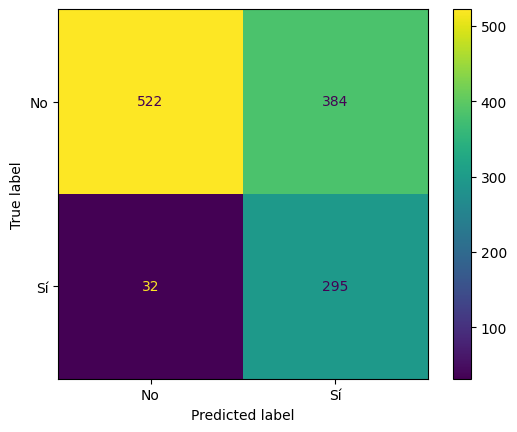

In [99]:
evaluar_modelo_umbral(modelo_regression, X_val_first_norm, y_val_first, umbral=0.3)

## **04 - Interpretación del Modelo: Importancia de Variables**





Se realiza el análisis de las variables más relevantes para la predicción de la cancelación

### **Regresión Logística: Coeficientes**

In [100]:
X_res_norm_df = pd.DataFrame(X_res_norm, columns=X_train_res_first.columns)

coeficientes = modelo_regression.coef_[0]

# Asociar nombres legibles
importancia_logreg = pd.DataFrame({
    'Variable': X_res_norm_df.columns,
    'Coeficiente Absoluto': coeficientes,
    'Impacto': np.abs(coeficientes)
}).sort_values(by='Coeficiente Absoluto', ascending=False).head(10)

display(importancia_logreg)

,Variable,Coeficiente Absoluto,Impacto
29,remainder__total,0.883890,0.883890
2,onehotencoder__servicio_internet_Fiber optic,0.779160,0.779160
1,onehotencoder__lineas_multiples_Yes,0.433609,0.433609
0,onehotencoder__lineas_multiples_No phone service,0.419815,0.419815
27,remainder__factura_online,0.402101,0.402101
13,onehotencoder__tv_streaming_Yes,0.340807,0.340807
22,remainder__adulto_mayor,0.314960,0.314960
15,onehotencoder__peliculas_streaming_Yes,0.251981,0.251981
19,onehotencoder__metodo_pago_Electronic check,0.217810,0.217810
21,remainder__genero,0.118735,0.118735


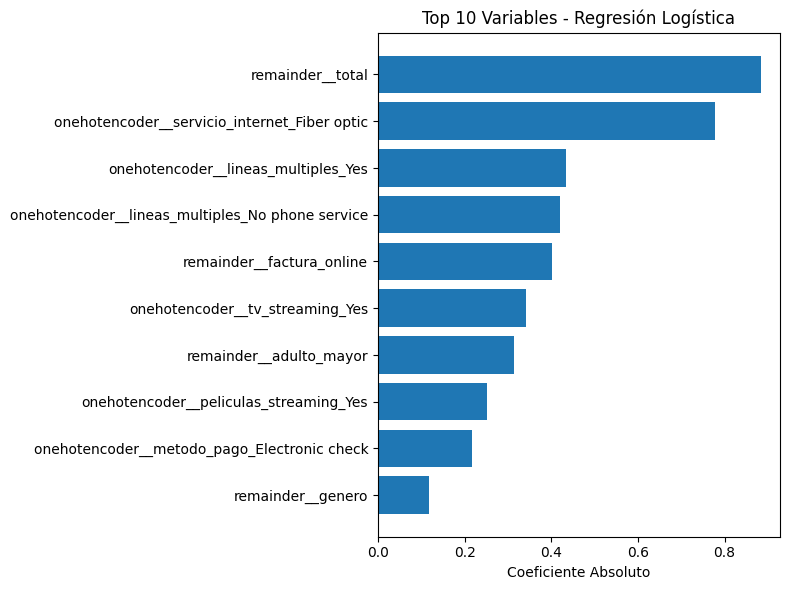

In [101]:
plt.figure(figsize=(8, 6))
plt.barh(importancia_logreg['Variable'], importancia_logreg['Coeficiente Absoluto'])
plt.title('Top 10 Variables - Regresión Logística')
plt.xlabel('Coeficiente Absoluto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **KNN: Variables más discriminantes (SelectKBest)**

In [113]:
result_knn = permutation_importance(
    modelo_knn,
    X_res_norm,
    y_train_res,
    scoring='recall',
    n_repeats=10,
    random_state=30
)

# Crear DataFrame con importancias
importancia_knn = pd.DataFrame({
    'Variable': X_train_res_first.columns,  # Recuperamos nombres originales
    'Importancia': result_knn.importances_mean
}).sort_values(by='Importancia', ascending=False)

# Mostrar top 10
top10_knn = importancia_knn.head(10)
top10_knn

,Variable,Importancia
25,remainder__meses_contrato,0.027835
1,onehotencoder__lineas_multiples_Yes,0.020508
29,remainder__total,0.018667
21,remainder__genero,0.018557
27,remainder__factura_online,0.018004
2,onehotencoder__servicio_internet_Fiber optic,0.016863
28,remainder__mensualidad,0.012518
30,remainder__cuentas_diarias,0.012408
23,remainder__pareja,0.011340
20,onehotencoder__metodo_pago_Mailed check,0.010641


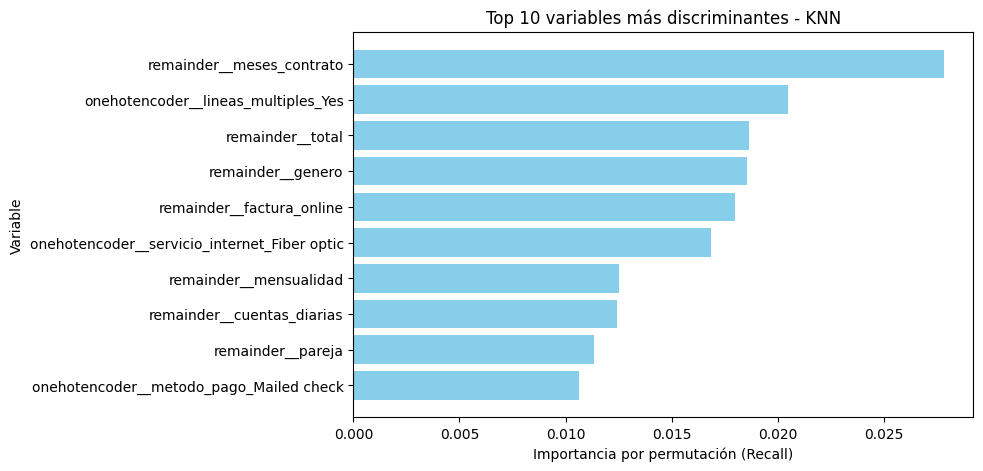

In [112]:
plt.figure(figsize=(8, 5))
plt.barh(top10_knn['Variable'], top10_knn['Importancia'], color='skyblue')
plt.gca().invert_yaxis()  # Para que la más importante quede arriba
plt.xlabel('Importancia por permutación (Recall)')
plt.ylabel('Variable')
plt.title('Top 10 variables más discriminantes - KNN')
plt.show()

### **Random Forest: Importancia de variables por impureza**




In [104]:
importancias = modelo_forest.feature_importances_
variables = X_train.columns

df_importancia_rf = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False).head(10)

df_importancia_rf_top10 = df_importancia_rf.head(10)

display(df_importancia_rf_top10)

,Variable,Importancia
24,onehotencoder__tipo_contrato_Month-to-month,0.130549
29,onehotencoder__metodo_pago_Electronic check,0.086406
35,remainder__meses_contrato,0.075027
6,onehotencoder__seguridad_online_No,0.073592
39,remainder__total,0.067148
15,onehotencoder__soporte_tecnico_No,0.065971
38,remainder__mensualidad,0.039291
26,onehotencoder__tipo_contrato_Two year,0.037766
40,remainder__cuentas_diarias,0.036143
9,onehotencoder__respaldo_online_No,0.035293


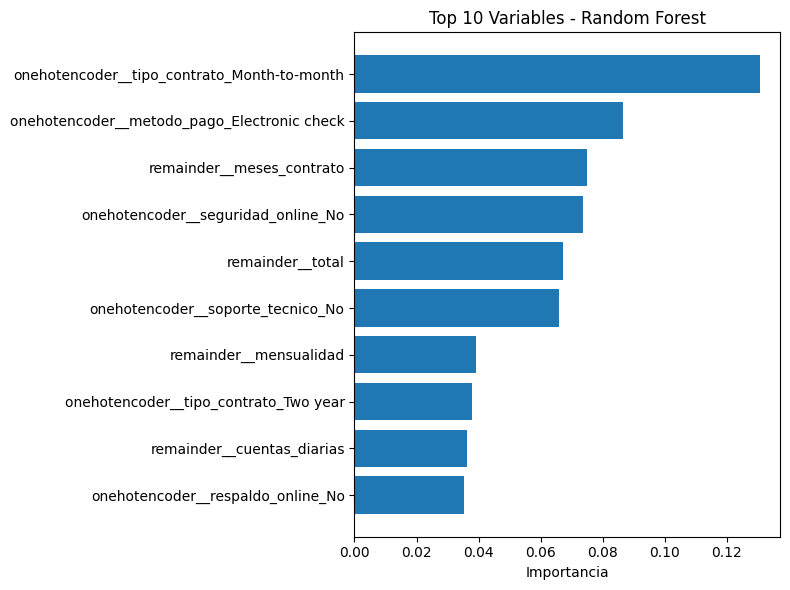

In [105]:
plt.figure(figsize=(8, 6))
plt.barh(df_importancia_rf['Variable'], df_importancia_rf['Importancia'])
plt.title('Top 10 Variables - Random Forest')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **DecisionTree: Importancia de variables por impureza**


In [106]:
importancias_tree = modelo_tree.feature_importances_
variables = X_train.columns

# Crear DataFrame de importancias
df_importancia_tree = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancias_tree
}).sort_values(by='Importancia', ascending=False)

# Mostrar solo las 10 más importantes
df_importancia_tree_top10 = df_importancia_tree.head(10)

display(df_importancia_tree_top10)

,Variable,Importancia
24,onehotencoder__tipo_contrato_Month-to-month,0.448939
6,onehotencoder__seguridad_online_No,0.136767
29,onehotencoder__metodo_pago_Electronic check,0.083182
39,remainder__total,0.054912
38,remainder__mensualidad,0.047868
35,remainder__meses_contrato,0.039496
17,onehotencoder__soporte_tecnico_Yes,0.023752
40,remainder__cuentas_diarias,0.022699
37,remainder__factura_online,0.019207
31,remainder__genero,0.016838


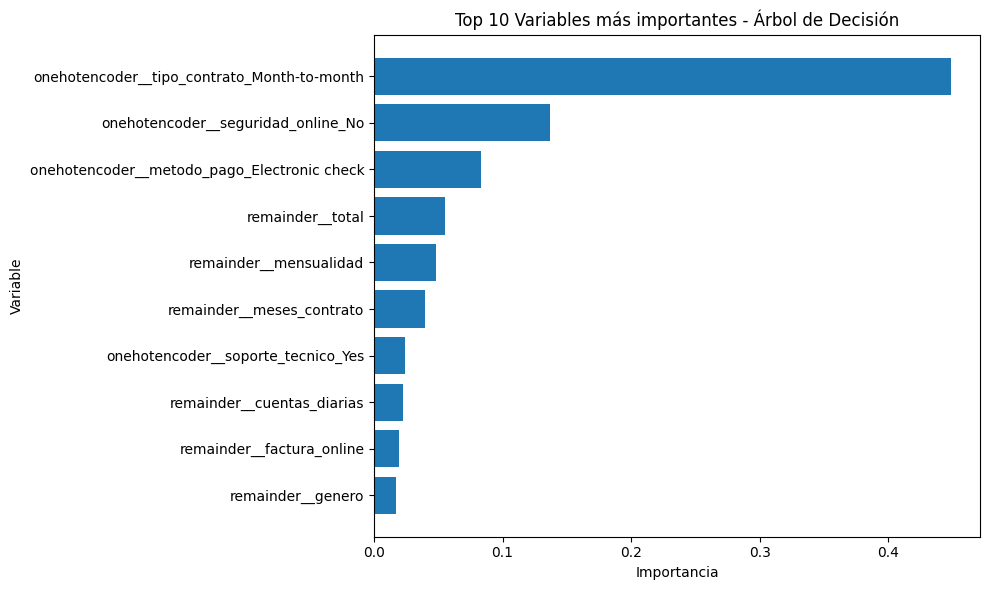

In [107]:

plt.figure(figsize=(10, 6))
plt.barh(df_importancia_tree_top10['Variable'], df_importancia_tree_top10['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Top 10 Variables más importantes - Árbol de Decisión')
plt.gca().invert_yaxis()  # Para que la más importante aparezca arriba
plt.tight_layout()
plt.show()


## **05 - Probando el mejor modelo**

Ya que el objetivo es poder detectar los usuarios que podrían abandonar a Telecom X, se opta por utilizar el modelo de **RandomForest** con un umbral de 0.3, esto por que aumenta el Recall sin sacrificar tanta presición.

In [119]:
y_proba_test = modelo_forest.predict_proba(X_test)[:, 1]
umbral = 0.3
y_pred_test = (y_proba_test >= umbral).astype(int)
print("Reporte de clasificación (Test set):")
print(classification_report(y_test, y_pred_test))

Reporte de clasificación (Test set):
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1552
         1.0       0.50      0.79      0.61       561

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.73      0.75      2113



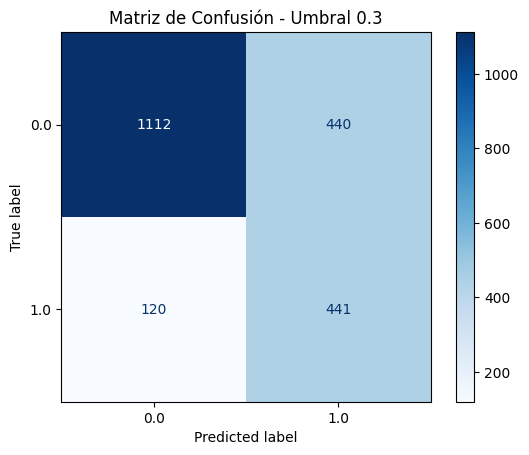

In [120]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_forest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusión - Umbral {umbral}')
plt.show()

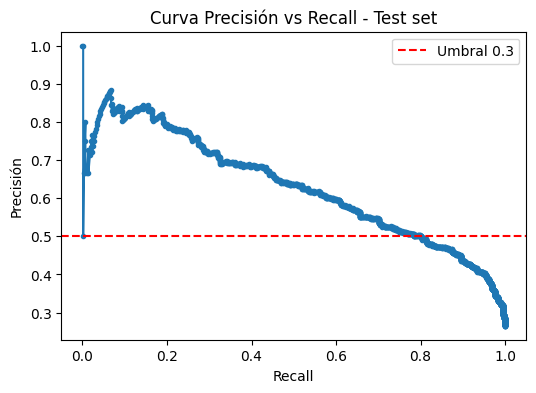

In [121]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.axhline(y=precision[thresholds.searchsorted(umbral)], color='red', linestyle='--', label=f'Umbral {umbral}')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precisión vs Recall - Test set')
plt.legend()
plt.show()

##**Conlusiones**

###**Introducción**

Se solicita desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y corresponde construir un pipeline robusto para esta etapa inicial de modelado.

Los datos ya han sido tratados en el proyecto anterior y fueron utilizados para concluir el proyecto actual con éxito. fue necesario realizar alguna preparación adicional de los datos para luego llevar a cabo los nuevos  análisis. Esto incluye la preparación adicional de los datos para desarrollar modelos predictivos, como por ejemplo, eliminar columnas irrelevantes para los modelos predictivos, verificar la proporción de cancelación, evaluar clases y, si es necesario, normalizar y estandarizar estos modelos.

Además, se realiza correlación y selección de variables, es decir, un análisis de correlación y un análisis dirigido, para así construir nuestro modelo predictivo. Finalmente, basado en los datos, se realiza un análisis de importancia entre las variables de estos modelos y se llega a una conclusión que ayude a la empresa Telecom X a anticiparse a la evasión de clientes.

###**Modelos de Machine Learning utilizados y variables de mayor impacto**

Se utilizan cuatro modelos de Machine Learning para este proyecto : **Decision Tree**, **RandomForest**, **KNN (K-Nearest Neighbors)** y **LogisticRegression**, se prepararon los datos y se aplicaron modificaciones a los modelos para obtener los mejores resultados posibles, se obtiene listado de las variables de mayor impacto a la hora de ocurrir la cancelación de los clientes:

| Modelo                  | Variables con indice alto | variables con indice medio               |
|---------------------------|------------------------|----------------------------------------|
| LogisticRegression | total | lineas_multiples_Yes
|                    | servicio_internet_Fiber optic|lineas_multiples_No phone service|
| KNN |	meses_contrato |  total    |
|     | lineas_multiples_Yes |	genero |
| | | factura_online|
| RandomForest | tipo_contrato_Month-to-month |meses_contrato |
| |metodo_pago_Electronic check| seguridad_online_No |
| DecisionTree | tipo_contrato_Month-to-month |seguridad_online_No |
| | |metodo_pago_Electronic check|

###**Propuestas para retención de clientes**

En base a lo observado a través de los modelos de Machine Learning se realizan las siguientes propuestas para evitar la fuga de clientes de Telecom X
*  **Incentivar el cambio de contrato**: Premiar el traspaso de un contrato mes a mes a un contrato anual o bianual con un porcentaje de descuento los primeros 4 meses.
* **Incentivar cambio de tipo de pago**: Solicitar el cambio de tipo de tipo de pago de cheque electrónico a alguno de los tipos de pago automatizado, al igual que con el cambio de contrato, se puede ofrecer un porcentaje de descuento para incentivar el cambio.
* **Ofertas para mejorar retención los primeros meses**: Bajar el precio de planes de los nuevos clientes por 10 meses o más para evitar la fuga de los usuarios.
* **Mejorar oferta de seguridad Online**: Promocionar ofertas de seguridad Online para usuarios.
